In [1]:
%matplotlib widget
import bmcs_utils.api as bu
from bmcs_shear.shear_crack.crack_extension import CrackExtension
from bmcs_shear.shear_crack.beam_design import RCBeamDesign
from bmcs_shear.shear_crack.crack_path import SZCrackPath
from bmcs_shear.shear_crack.stress_profile import SZStressProfile
from bmcs_shear.api import CrackBridgeAdv
import numpy as np
np.seterr(divide='ignore', invalid='ignore') ;

In [2]:
sz_cp = SZCrackPath(x_00=400, n_m=12)
ce = CrackExtension(sz_cp=sz_cp)
ce.sz_bd.trait_set(H=400 ,L=1000, B=50)
sz_sp = ce.sz_stress_profile

In [3]:
ce.sz_bd.csl.add_layer(
    CrackBridgeAdv(z=44, n=2, d_s=2, E = 210000, tau = 16, sig_y = 713, 
                   dowel_factor = 1, f_c = 33.3)
)
#sz_cp.add_x_tip_an([400 ,100])

In [4]:
ce.get_R()

F_a
R [-9.66509424e-01  2.10699174e+03]


array([-9.66509424e-01,  2.10699174e+03])

R [-9.66509424e-01  2.10699174e+03]
R [-9.66509424e-01  2.10699174e+03]
R [-9.66509424e-01  2.10699174e+03]
R [ -28.30862103 2106.99174391]
R [-9.66509424e-01  2.10699174e+03]
R [  -5.23078895 2106.99174391]
R [ -10.19458771 2106.99174391]
R [ -28.30862103 2106.99174391]
R [-9.66509424e-01  2.10699174e+03]
R [  -5.23078895 2106.99174391]
R [ -10.19458771 2106.99174391]
R [ -14.65861455 2106.99174391]
R [ -18.32187941 2106.99174391]
R [ -21.20634016 2106.99174391]
R [ -23.42738353 2106.99174391]
R [ -25.10698888 2106.99174391]
R [ -26.3222197  2106.99174391]
R [-9.66509424e-01  2.10699174e+03]
no convergence


StopIteration: no solution found

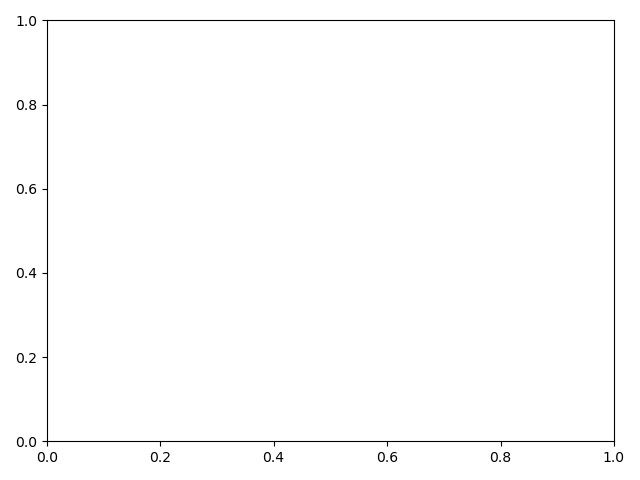

In [5]:
ce.interact()

In [8]:
x_00 = 900
bd = RCBeamDesign(H=400 ,L=1000, B=50)
sz_cp = SZCrackPath(sz_bd=bd, x_00=x_00)
sz_cp.add_x_tip_an([x_00 ,100])
ce = CrackExtension(sz_cp=sz_cp)
ce.sz_bd.matrix_.trait_set(L_fps=50)

In [3]:
ce.sz_bd.csl.add_layer(
    CrackBridgeAdv(z=44, n=2, d_s=28, E = 210000, tau = 16, sig_y = 713, 
                   dowel_factor = 1, f_c = 33.3)
)

In [4]:
sz_sp = ce.sz_stress_profile

In [6]:
sz_cp.x_t_Ia

array([[400.,   0.],
       [400., 100.]])

In [5]:
sz_cp.T_Lab

XXXXXXXXXXXXXXXXXXXXXXX [[400.   0.]
 [400. 100.]]


array([[[1., 0.],
        [0., 1.]]])

In [6]:
x_tip_1 = sz_cp.sz_ctr.x_tip_ak[1]
idx_tip = np.argmax( sz_cp.x_Ka[:,1] >= x_tip_1 )
u_a = sz_sp.ds.x1_Ka[idx_tip] - sz_cp.x_Ka[idx_tip]
T_ab = sz_sp.sz_cp.T_Lab[-1,:]
u_b = np.einsum('a,ab->b', u_a, T_ab)
sig_b = sz_sp.ds.sz_bd.matrix_.get_sig_a(u_b)
sig_a = np.einsum('b,ab->a', sig_b, T_ab)

In [7]:
sig_a

array([-0.00403277,  0.11341484])

In [4]:
ce.X

f_ct 3
f_cm 33.3


IndexError: index -1 is out of bounds for axis 0 with size 0

In [ ]:
bu.InteractiveWindow([ce, ce.sz_stress_profile, 
                      ce.sz_bd.cmm, ce.sz_cp, ce.sz_cp.sz_ctr]).interact()


In [6]:
beta_arr = np.linspace(0, 1.5, 10)
psi_arr = []
for beta in beta_arr:
    ce.sz_ctr.beta = beta
    psi_arr.append(ce.crack_tip_orientation.get_psi())#bu.InteractiveWindow(ce).interact()

In [7]:
print(psi_arr)

[0.7943163189119268, 0.7943163189119268, 0.7943163189119268, 0.7943163189119268, 0.7943163189119268, 0.7943163189119268, 0.7943163189119268, 0.7943163189119268, 0.7943163189119268, 0.7943163189119268]


In [8]:
x_1_arr = np.linspace(0, 300, 10)
psi2_arr = []
for x_1 in x_1_arr:
    ce.sz_ctr.x_rot_1k = x_1
    psi2_arr.append(ce.crack_tip_orientation.get_psi())#bu.InteractiveWindow(ce).interact()

<lambdifygenerated-29>:2: RuntimeWarning: invalid value encountered in sqrt
  return (select([less_equal(w, 0),True], [0,0.25*f_c*s*(-sqrt(2)*sqrt(w/d_a) + 1)*((2.44 - 39.04/f_c)*abs(s/w)**3 + 9.8/f_c)/(w*(s**4*(2.44 - 39.04/f_c)/w**4 + 1))], default=nan))
<lambdifygenerated-36>:2: RuntimeWarning: invalid value encountered in sqrt
  return (select([less(s, (1/2)*A_f*Dummy_198**2/(Dummy_199*Dummy_200*p)),True], [sqrt(2)*sqrt(A_f)*sqrt(Dummy_199)*sqrt(Dummy_200)*sqrt(p)*sqrt(s),A_f*Dummy_198], default=nan))
<lambdifygenerated-28>:2: RuntimeWarning: overflow encountered in exp
  return (select([less(f_c, -35.7142857142857*d_a**(-0.32)*f_c**(-0.18)*f_t**2*w),less_equal(w, 0.028*d_a**0.32*f_c**0.18/f_t),True], [-f_c,35.7142857142857*d_a**(-0.32)*f_c**(-0.18)*f_t**2*w,f_t*exp(-35.7142857142857*d_a**(-0.32)*f_c**(-0.18)*f_t*(-0.028*d_a**0.32*f_c**0.18/f_t + w))], default=nan))


In [9]:
print(psi2_arr)


[nan, nan, 0.8466441436587951, 0.811621336356311, 0.7901860811761493, 0.7886042491449666, 0.7853193598185636, 0.7851910317454058, 0.7723756515142234, 0.774018887282633]
